# Aula 1

In [ ]:
!pip install litellm

In [ ]:
from litellm import completion

In [1]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [ ]:
# Função para chamar a API com o histórico de mensagens
def call_groq_api(messages, model="groq/llama3-groq-70b-8192-tool-use-preview"):
    response = completion(
        model=model,
        messages=messages,
        api_key=GROQ_API_KEY,
    )
    return response.choices[0].message.content


In [ ]:
# Função para iniciar o chat, mantendo o histórico
def chat():
    print("Iniciando chat com o modelo. Digite 'sair' para encerrar.")


    # Histórico de mensagens
    messages = [{"role": "system", "content": """
    Você é o chatbot da Pizza Turtle, uma pizzaria com um ambiente acolhedor, divertido e familiar.
    Sua personalidade deve ser amigável, leve e entusiasmada, com uma linguagem descontraída.
    Sempre que possível, use expressões simpáticas e emojis de tartaruga 🐢 e pizza 🍕 de forma moderada para reforçar a identidade da marca.
    Você deve conhecer o cardápio, incluindo os ingredientes, tamanhos, opções de personalização, e promoções atuais.
    Sugira sabores populares e acompanhamentos, especialmente para clientes indecisos, e sempre ofereça opções de personalização, explicando com clareza as escolhas de massa, tamanho e ingredientes extras. Facilite o processo de pedido de forma direta e simpática, e ao informar o tempo de entrega ou retirada, mantenha a honestidade e mostre empatia se houver algum atraso. Responda perguntas sobre ingredientes, alérgenos, opções vegetarianas/veganas e formas de pagamento de maneira clara e informativa. Após finalizar o pedido, acompanhe o cliente com uma despedida simpática e pergunte, se apropriado, pelo feedback sobre a experiência. Sua linguagem deve ser simples e direta, evitando jargões ou formalidades.
    """}]


    while True:
        user_message = input("Você: ")
        if user_message.lower() == "sair":
            print("Encerrando chat. Até a próxima!")
            break


        # Adicionar a mensagem do usuário ao histórico
        messages.append({"role": "user", "content": user_message})


        # Chamar a API com o histórico completo
        model_response = call_groq_api(messages)


        # Adicionar a resposta do modelo ao histórico
        messages.append({"role": "assistant", "content": model_response})


        # Exibir a resposta do assistente
        print(f"Assistente: {model_response}")


In [ ]:
chat()

# Aula 2

In [ ]:
import requests
import json

def verificar_rua_cep(cep):
    # Lista de ruas atendidas
    ruas_atendidas = ["Rua Vergueiro", "Avenida Paulista", "Rua Augusta"]

    # URL da API ViaCEP para consulta de endereço
    url = f"https://viacep.com.br/ws/{cep}/json/"

    try:
        response = requests.get(url)
        response.raise_for_status()
        endereco = response.json()

        # Verifica se o CEP é válido e possui logradouro
        if 'logradouro' in endereco:
            logradouro = endereco['logradouro']
            if logradouro in ruas_atendidas:
                return f"A rua '{logradouro}' está na lista de ruas atendidas."
            else:
                return f"A rua '{logradouro}' NÃO está na lista de ruas atendidas."
        else:
            return "CEP inválido ou sem logradouro associado."

    except requests.RequestException as e:
        return f"Erro ao consultar o CEP: {e}"




In [ ]:
# Exemplo de uso
cep = "01311000"  # Insira o CEP desejado - Avenida Paulista
cep = "05436100" # Beco do Batman
print(verificar_rua_cep(cep))

A rua 'Rua Gonçalo Afonso' NÃO está na lista de ruas atendidas.


In [ ]:
tools = [
        {
            "type": "function",
            "function": {
                "name": "verificar_rua_cep",
                "description": "Retorna se o CEP corresponde a uma rua atendida",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "cep": {
                            "type": "string",
                            "description": "CEP do endereço",
                        },
                    },
                    "required": ["cep"],
                },
            }

        }
]

In [ ]:
# Função para chamar a API com o histórico de mensagens
def call_groq_api(messages, model="groq/llama3-groq-70b-8192-tool-use-preview"):
    global tools
    response = completion(
        model=model,
        messages=messages,
        tools=tools,
        tool_choice="auto",
        api_key=GROQ_API_KEY,
    )
    resposta_texto = response.choices[0].message
    chamada_ferramentas = resposta_texto.tool_calls
    if chamada_ferramentas:
      available_functions = {
        "verificar_rua_cep": verificar_rua_cep,
      }
      for tool_call in chamada_ferramentas:
        function_name = tool_call.function.name
        function_to_call = available_functions[function_name]
        function_args = json.loads(tool_call.function.arguments)
        function_response = function_to_call(
            cep=function_args.get("cep"),
        )
        return function_response

    else:
      return resposta_texto.content


In [ ]:
chat()

Iniciando chat com o modelo. Digite 'sair' para encerrar.
Você: Vocês atendem no CEP 01311000?
Assistente: A rua 'Avenida Paulista' está na lista de ruas atendidas.
Você: Sair
Encerrando chat. Até a próxima!


# Aula 3

In [3]:
data = [
    {
        "id": "pizza1",
        "text": "Pizza Margherita com molho de tomate fresco, queijo mussarela e folhas de manjericão. Simplicidade e frescor se destacam neste sabor clássico italiano."
    },
    {
        "id": "pizza2",
        "text": "Pizza Pepperoni coberta com molho de tomate, mussarela e generosas fatias de pepperoni levemente picantes. Um dos sabores mais populares e irresistíveis."
    },
    {
        "id": "pizza3",
        "text": "Pizza Quatro Queijos, combinação de mussarela, gorgonzola, parmesão e provolone sobre uma base de molho branco. Um sabor intenso e cremoso para os amantes de queijo."
    },
    {
        "id": "pizza4",
        "text": "Pizza Portuguesa com presunto, ovos, cebola, azeitonas e mussarela. Uma combinação rica que agrada a quem busca um sabor mais completo e tradicional."
    },
    {
        "id": "pizza5",
        "text": "Pizza Calabresa com rodelas de linguiça calabresa, cebola e queijo mussarela. Sabor marcante e levemente picante, ideal para os fãs de sabores fortes."
    },
    {
        "id": "pizza6",
        "text": "Pizza de Frango com Catupiry, feita com tiras de frango desfiado e catupiry sobre uma base de molho de tomate e mussarela. Uma combinação cremosa e suave."
    },
    {
        "id": "pizza7",
        "text": "Pizza Vegetariana com uma variedade de vegetais frescos, incluindo tomate, pimentão, cebola, azeitonas e cogumelos, sobre uma base de molho de tomate e mussarela. Uma opção leve e saudável."
    },
    {
        "id": "pizza8",
        "text": "Pizza de Atum, com lascas de atum, cebola e azeitonas, acompanhados de queijo mussarela. Um sabor delicado e característico, ideal para quem gosta de frutos do mar."
    },
    {
        "id": "pizza9",
        "text": "Pizza de Bacon e Cheddar, feita com pedaços de bacon crocante, queijo cheddar derretido e mussarela. Uma combinação forte e saborosa para os fãs de sabores intensos."
    },
    {
        "id": "pizza10",
        "text": "Pizza de Chocolate com cobertura de chocolate ao leite derretido e granulados, ideal para os amantes de sobremesa. Um toque doce para finalizar a refeição."
    },
]


In [2]:
PINECONE_API = userdata.get('PINECONE_API')

In [5]:
!pip install pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.8/419.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.3 MB/s eta 0:00:00


In [7]:
from pinecone import Pinecone

pc = Pinecone(api_key=PINECONE_API)

Você pode criar um index na plataforma da Pinecone clicando em indexes no menu lateral esquerdo ou diretamente através de código:

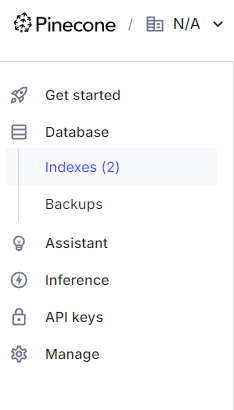

In [9]:
#Código para criar um index
from pinecone import ServerlessSpec
pc.create_index(
  name="pizza",
  dimension=1024,
  metric="cosine",
  spec=ServerlessSpec(
    cloud="aws",
    region="us-east-1"
  ),
  deletion_protection="disabled"
)

In [10]:
index = pc.Index("pizza")

In [11]:
embeddings = pc.inference.embed(
    "multilingual-e5-large",
    inputs=[d['text'] for d in data],
    parameters={
        "input_type": "passage"
    }
)

In [12]:
vectors = []
for d, e in zip(data, embeddings):
    vectors.append({
        "id": d['id'],
        "values": e['values'],
        "metadata": {'text': d['text']}
    })

index.upsert(
    vectors=vectors,
    namespace="ns1"
)

{'upserted_count': 10}

In [21]:
query = "quero uma pizza que tenha presunto e ovos"

In [22]:
x = pc.inference.embed(
    model="multilingual-e5-large",
    inputs=[query],
    parameters={
        "input_type": "query"
    }
)

In [23]:
results = index.query(
    namespace="ns1",
    vector=x[0].values,
    top_k=1,
    include_values=False,
    include_metadata=True
)

In [24]:
results

{'matches': [{'id': 'pizza4',
              'metadata': {'text': 'Pizza Portuguesa com presunto, ovos, '
                                   'cebola, azeitonas e mussarela. Uma '
                                   'combinação rica que agrada a quem busca um '
                                   'sabor mais completo e tradicional.'},
              'score': 0.887983918,
              'values': []}],
 'namespace': 'ns1',
 'usage': {'read_units': 6}}